In [1]:
import pandas as pd
# Load the dataset
train_data = pd.read_csv("pbmc68k_train_data.csv")
train_data.head()


,Unnamed: 0,pseudo_celltype,GENE_CFNXG_1,GENE_LABCP_2,GENE_HGDRI_3,GENE_SHKCA_4,GENE_SIFDX_5,GENE_VYBVG_6,GENE_AKTYK_7,GENE_IEXZJ_8,...,GENE_FSJCE_1645,GENE_KFDFO_1646,GENE_LZLCS_1647,GENE_IGLJK_1648,GENE_DSJGX_1649,GENE_YVWUJ_1650,GENE_ZSQYQ_1651,GENE_LEMJV_1652,GENE_FPOMQ_1653,GENE_TIFZW_1654
0,CGCAGGTGGGTAGG-2-1,NK cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AGGACTTGGGACAG-1-1,NK cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TAGGCATGTCTTTG-8-1,NK cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GGTCTAGAGAAACA-4-1,NK cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CCACTGACGACGAG-3-0,Dendritic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [2]:
dimensions = train_data.shape
print(f"Dataset dimensions: {dimensions}")

Dataset dimensions: (51369, 1656)


In [3]:
test_data = pd.read_csv("pbmc68k_test_data_nolabel.csv")
test_data.head()


,Unnamed: 0,GENE_CFNXG_1,GENE_LABCP_2,GENE_HGDRI_3,GENE_SHKCA_4,GENE_SIFDX_5,GENE_VYBVG_6,GENE_AKTYK_7,GENE_IEXZJ_8,GENE_KMMEC_9,...,GENE_FSJCE_1645,GENE_KFDFO_1646,GENE_LZLCS_1647,GENE_IGLJK_1648,GENE_DSJGX_1649,GENE_YVWUJ_1650,GENE_ZSQYQ_1651,GENE_LEMJV_1652,GENE_FPOMQ_1653,GENE_TIFZW_1654
0,GAACGGGATAGCGT-8-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACAATCCTTCAGTG-1-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAGAGATGAGATGA-6-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AGAGTGCTCCTGTC-6-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TGACCAGAGTGCAT-4-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dimensions_test = test_data.shape
print(f"Test Dataset dimensions: {dimensions_test}")


Test Dataset dimensions: (17123, 1655)


the test dataset has one column more
== the label one

I'll continue with the preprocessing of the train dataset

In [5]:
unique_labels = train_data["pseudo_celltype"].unique()
print(f"unique labels: {unique_labels}")



unique labels: ['NK cells' 'Dendritic' 'Cytotoxic' 'Myeloid' 'Other' 'Progenitor'
 'Plasma' 'B cells' 'Stem-like' 'T cells']


In [6]:
import numpy as np

In [7]:
train_data_no_labels = train_data.drop(columns=["pseudo_celltype"])
# what is the percentage of zero values in the dataset
num_zero_values = (train_data_no_labels == 0).sum().sum() / train_data_no_labels.size
print(f"Fraction of zeros in dataset: {num_zero_values:.3f}")

Fraction of zeros in dataset: 0.952


In [8]:
import matplotlib.pyplot as plt

In [9]:
train_data_no_labels = train_data_no_labels.apply(pd.to_numeric, errors='coerce')
#remove all the integers/objects that are not numeric
counts = train_data_no_labels.values.flatten() #flatten to 1D array because we only need the distribution of the values, not per cell
counts = counts[~np.isnan(counts)] #remove NaNs if there are any
# we want to check what the max value is
nonzero_counts = counts[counts > 0]

print("Max non-zero gene expression count:", nonzero_counts.max())
print("Top 10 highest counts:", np.sort(nonzero_counts)[-10:])


Max non-zero gene expression count: 242.0
Top 10 highest counts: [113. 114. 114. 117. 119. 120. 123. 140. 151. 242.]


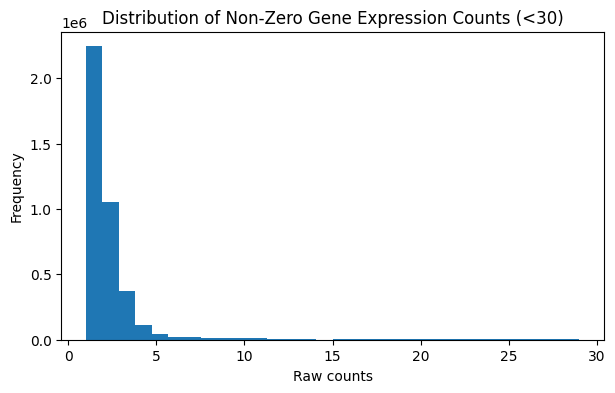

In [10]:
filtered = counts[(counts > 0) & (counts < 30)] # 30 is easier to visualize than 243
plt.figure(figsize= (7, 4))
plt.hist(filtered, bins=30)
plt.title("Distribution of Non-Zero Gene Expression Counts (<30)")
plt.xlabel("Raw counts")
plt.ylabel("Frequency")
plt.show()

distribution is rigth skewed = long tail to the right
this is normal for RNAseq data, but we need to transform it for a ML model


In [11]:
# log transformation
log_transformed_train_no_labels = np.log1p(train_data_no_labels)
#log 1p handles zeroes safely for the log transformation 

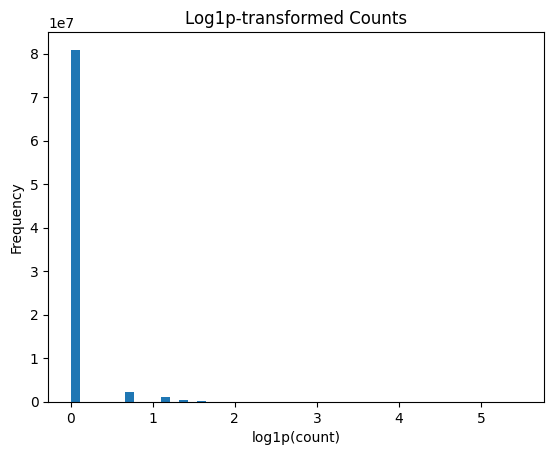

In [12]:
vals = log_transformed_train_no_labels.values.flatten()
vals = vals[~np.isnan(vals)]

plt.hist(vals, bins=50)
plt.title("Log1p-transformed Counts")
plt.xlabel("log1p(count)")
plt.ylabel("Frequency")
plt.show()


In [13]:
#normalization
norm_transformed_train_no_labels = train_data_no_labels.div(train_data_no_labels.sum(axis=1), axis=0) * 1e4
log_norm_transformed_train_no_labels = np.log1p(norm_transformed_train_no_labels)

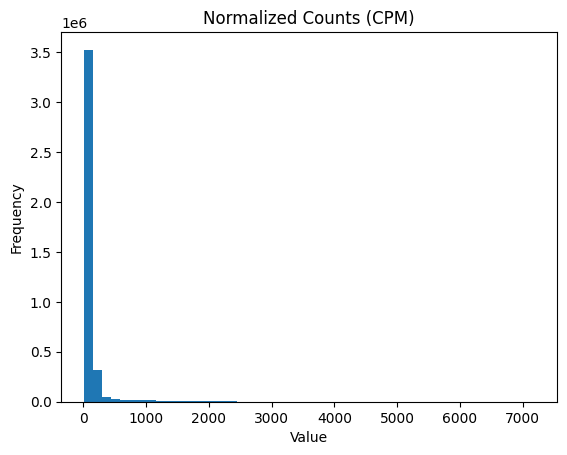

In [14]:
vals = norm_transformed_train_no_labels.values.flatten()
vals = vals[vals > 0]   # remove zeros for nicer view

plt.hist(vals, bins=50)
plt.title("Normalized Counts (CPM)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


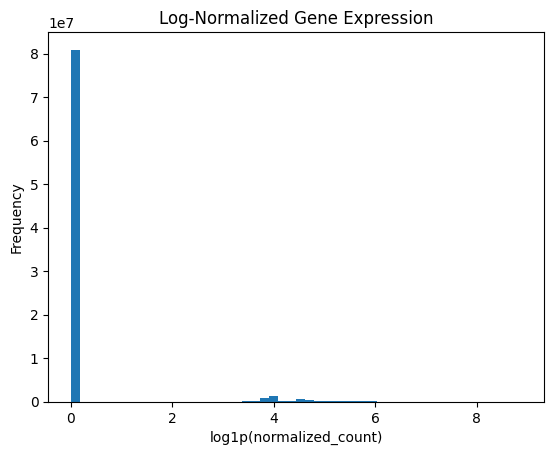

In [15]:
vals = log_norm_transformed_train_no_labels.values.flatten()
vals = vals[~np.isnan(vals)]

plt.hist(vals, bins=50)
plt.title("Log-Normalized Gene Expression")
plt.xlabel("log1p(normalized_count)")
plt.ylabel("Frequency")
plt.show()


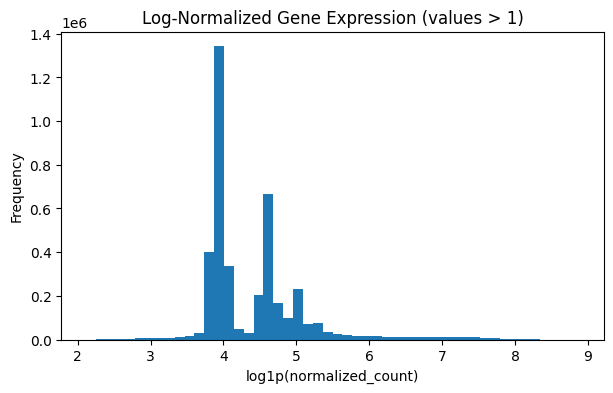

In [16]:
##remove the values between 0 and 1 
vals = log_norm_transformed_train_no_labels.values.flatten()

# Remove NaN
vals = vals[~np.isnan(vals)]

# Remove "small" values
vals = vals[vals > 1]   

plt.figure(figsize=(7,4))
plt.hist(vals, bins=50)
plt.title("Log-Normalized Gene Expression (values > 1)")
plt.xlabel("log1p(normalized_count)")
plt.ylabel("Frequency")
plt.show()


this is the kind of gaussian distribution that we expect
variance is stabilized

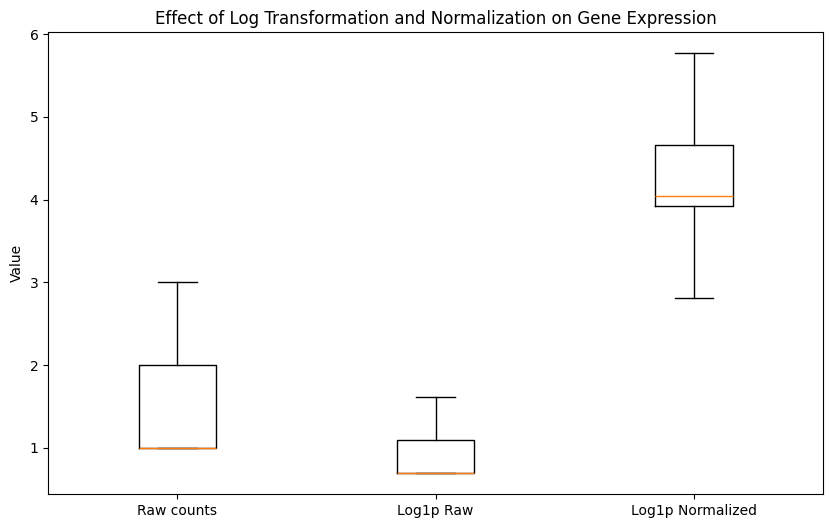

In [17]:
# Prepare flattened arrays
raw_vals = train_data_no_labels.values.flatten()
raw_vals = raw_vals[raw_vals > 0]

log_vals = log_transformed_train_no_labels.values.flatten()
log_vals = log_vals[log_vals > 0]

log_norm_vals = log_norm_transformed_train_no_labels.values.flatten()
log_norm_vals = log_norm_vals[log_norm_vals > 0]

# Create boxplot
plt.figure(figsize=(10,6))
plt.boxplot([raw_vals, log_vals, log_norm_vals],
            labels=["Raw counts", "Log1p Raw", "Log1p Normalized"],
            showfliers=False)  # hide extreme outliers for clarity
plt.ylabel("Value")
plt.title("Effect of Log Transformation and Normalization on Gene Expression")
plt.show()


you can see that after log + normalization the variance stabilized

now we do a PCA

In [18]:
X = log_norm_transformed_train_no_labels.values   # matrix of shape (n_cells, n_genes)
y = train_data["pseudo_celltype"] 
X_filled = np.nan_to_num(log_norm_transformed_train_no_labels.values, nan=0.0)
label_codes = y.astype("category").cat.codes


In [19]:
categories = y.astype("category").cat.categories
print(categories)


Index(['B cells', 'Cytotoxic', 'Dendritic', 'Myeloid', 'NK cells', 'Other',
       'Plasma', 'Progenitor', 'Stem-like', 'T cells'],
      dtype='object')


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)
# Some columns contained non-numeric or invalid values.
# After converting to numeric using errors="coerce", these became NaN.
# PCA cannot handle NaNs, so the matrix was cleaned using np.nan_to_num(),
# replacing missing values with zero (biologically meaningful as “no expression”).


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)


important, for PCA, NaN are not allowed

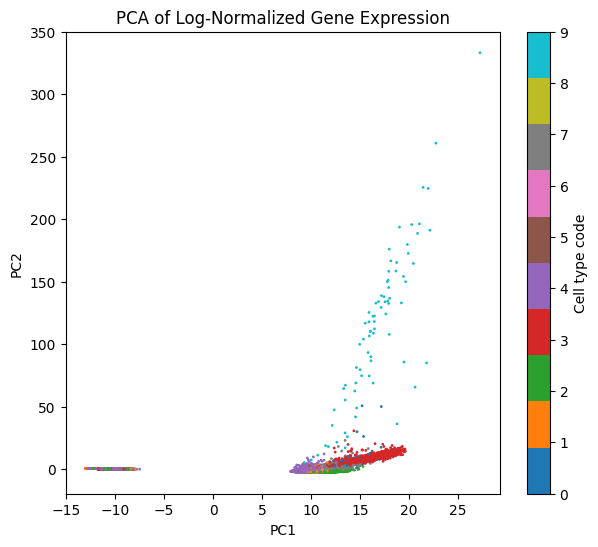

In [22]:
# Convert labels to integer codes for coloring
label_codes = y.astype("category").cat.codes

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=label_codes, cmap="tab10", s=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Log-Normalized Gene Expression")
plt.colorbar(label="Cell type code")
plt.show()
#-> there is still technical variation, lets get deeper into this since there are PC2 values > 300. this might be a batch effect

inspect the cells with the highest PC2 values

In [23]:
outliers = np.where(X_pca[:, 1] > 100)[0]
train_data.iloc[outliers]


,Unnamed: 0,pseudo_celltype,GENE_CFNXG_1,GENE_LABCP_2,GENE_HGDRI_3,GENE_SHKCA_4,GENE_SIFDX_5,GENE_VYBVG_6,GENE_AKTYK_7,GENE_IEXZJ_8,...,GENE_FSJCE_1645,GENE_KFDFO_1646,GENE_LZLCS_1647,GENE_IGLJK_1648,GENE_DSJGX_1649,GENE_YVWUJ_1650,GENE_ZSQYQ_1651,GENE_LEMJV_1652,GENE_FPOMQ_1653,GENE_TIFZW_1654
1896,TGCGAAACACCATG-1-0,T cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3349,GAACAGCTTTGTGG-2-0,T cells,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3491,TGTAGGTGAAGCAA-5-0,T cells,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3987,CCTCGAACTCTTCA-6-0,T cells,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4239,TAGGCAACGACAAA-4-0,T cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4501,CATAAATGGAGCTT-4-0,T cells,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5648,GATTTAGAGACTAC-4-0,T cells,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6016,GGAGTTTGCATCAG-7-0,T cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8223,GACGCTCTAGGCGA-8-0,T cells,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8431,CACTATACAAAAGC-1-0,T cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
library_sizes = train_data_no_labels.sum(axis=1)
library_sizes.iloc[outliers].describe()


count     46.000000
mean     391.608696
std      180.801853
min      185.000000
25%      264.000000
50%      329.000000
75%      456.250000
max      997.000000
dtype: float64

these are unusually high library sizes => PC2 is dominated by a cluster of T cells => batch effect
(mean ≈ 392, max ≈ 997)
I assume this is the batch effect manually inserted int he assignment as stated in the description.
here is a comparison or distribution of the library sizes:

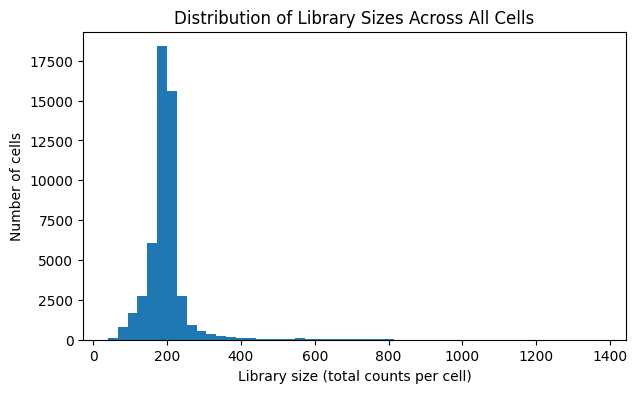

In [25]:
library_sizes = train_data_no_labels.sum(axis=1)


plt.figure(figsize=(7,4))
plt.hist(library_sizes, bins=50)
plt.xlabel("Library size (total counts per cell)")
plt.ylabel("Number of cells")
plt.title("Distribution of Library Sizes Across All Cells")
plt.show()


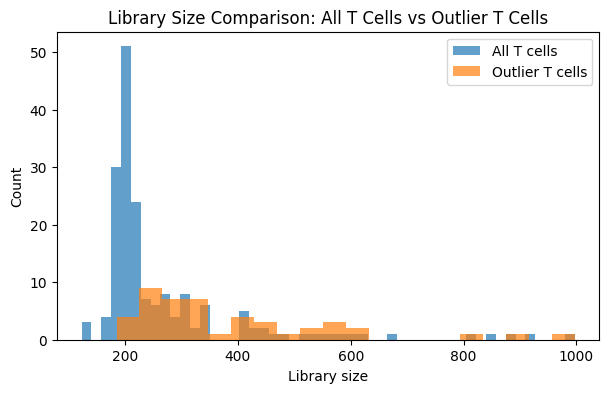

In [26]:
is_tcell = train_data["pseudo_celltype"] == "T cells"
tcell_lib = library_sizes[is_tcell]
outlier_lib = library_sizes.iloc[outliers]

plt.figure(figsize=(7,4))
plt.hist(tcell_lib, bins=50, alpha=0.7, label="All T cells")
plt.hist(outlier_lib, bins=20, alpha=0.7, label="Outlier T cells")
plt.xlabel("Library size")
plt.ylabel("Count")
plt.legend()
plt.title("Library Size Comparison: All T Cells vs Outlier T Cells")
plt.show()


It is pretty clear in the last plot that the batch effect occured because the library sizes from the bacth that showed higher PC2 values, has library sizes from the right tail of the distibution of library sizes.

Next step: no corrrection is needed for prediction per se. removing them would redice trianing diversity so i will leave them in, the classifier in the end will learn to differentiate the cells in either case. 

For better visualization of the PCA plot, I will remover the outliers though.

Outliers: 46


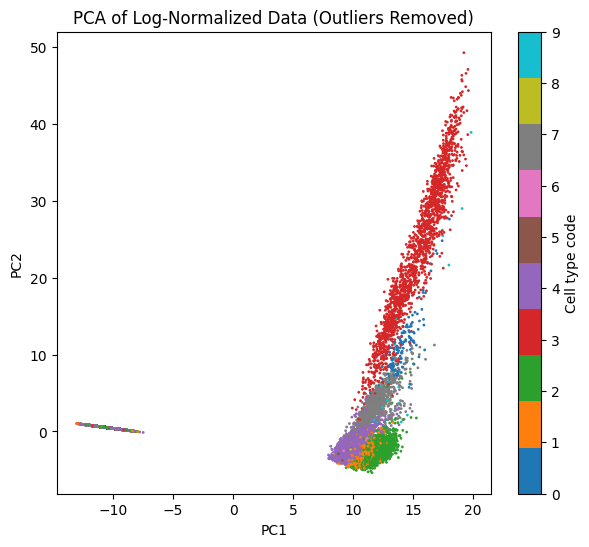

In [27]:
# Step 1: Start from log-normalized, then fill NaNs before ANY PCA
X_full = np.nan_to_num(log_norm_transformed_train_no_labels.values, nan=0.0)

label_codes_full = train_data["pseudo_celltype"].astype("category").cat.codes

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

from sklearn.decomposition import PCA

pca_temp = PCA(n_components=10)
X_pca_temp = pca_temp.fit_transform(X_full_scaled)

outliers = np.where(X_pca_temp[:, 1] > 100)[0]
print("Outliers:", len(outliers))

mask = np.ones(X_full_scaled.shape[0], dtype=bool)
mask[outliers] = False

X_scaled_clean = X_full_scaled[mask]
labels_clean = label_codes_full[mask]

pca = PCA(n_components=50)
X_pca_clean = pca.fit_transform(X_scaled_clean)

plt.figure(figsize=(7,6))
plt.scatter(X_pca_clean[:,0], X_pca_clean[:,1],
            c=labels_clean, cmap='tab10', s=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Log-Normalized Data (Outliers Removed)")
plt.colorbar(label="Cell type code")
plt.show()


Now the first PC plot is less biased by the batch effect
we can clearly see the different celltypes clustered
PCA now captures biological variance, not technical noise
next: inspect which principal components are meaningful.

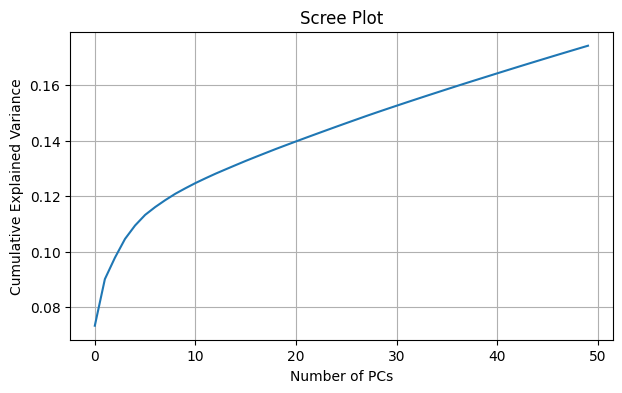

In [28]:
plt.figure(figsize=(7,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


In [29]:
loading_scores = pca.components_[0]  # PC1 loadings


Here I decide how many PCs I keep:
After ~20 PCs, the curve becomes nearly linear 
probably reduce to 20–40 components

Rule of thumb for high-dimensional scRNA-seq-like datasets:

Keep 20–50 PCs depending on the classifier:

Logistic Regression / SVM: 20–40 PCs

Random Forest: fewer PCs (10–20) are fine

Gradient Boosting / XGBoost: 20–50 PCs

kNN: 30–50 PCs

what was the purpose of this PCA: Train ML model on {samples × PCs}, otherwise couldn't handle the data


In [30]:
X_final = X_pca_clean[:, :30]
y_final = labels_clean
# choose 30 PCs


In [31]:
# start with linear regression, then random forest
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000, multi_class='multinomial', n_jobs = 1)
clf.fit(X_final, y_final)


/home/daria/anaconda3/envs/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'multinomial'


I just defined the model and set the hyperparameters
L2 regularization: penalizes large weights
'lbfgs' is the algorythm for logistic regression
all classes treated equally
use of 1 cpu

In [32]:
X_train = X_pca_clean[:, :30] 
# X_train = X_pca_clean[:, :50] Wasn't much better F1: 0.72709...

y_train = labels_clean          


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=2000
)

model.fit(X_train, y_train)


/home/daria/anaconda3/envs/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'multinomial'


In [34]:
#evaluate the model
from sklearn.metrics import f1_score

y_pred = model.predict(X_train)
score = f1_score(y_train, y_pred, average='weighted')

print("Training weighted F1:", score)


Training weighted F1: 0.7265356295499611


Not bad, but room for improvement
Logistic Regression = linear boundaries

But my cell clusters are nonlinear (curved, overlapping).

I'm going to try  random forest

but first I will chaange the hyperparameters of C

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def tune_logreg_C(X, y, C_values=[0.1, 0.5, 1, 2, 5, 10], max_iter=2000, plot=True):
    """
    Tunes the regularization parameter C for multinomial logistic regression.
    
    Parameters:
        X (numpy array): PCA-transformed training data.
        y (numpy array): label codes.
        C_values (list): list of C values to test.
        max_iter (int): max number of iterations for training.
        plot (bool): whether to plot the results.
        
    Returns:
        results (dict): C -> weighted F1 score
    """
    
    results = {}
    
    for C in C_values:
        model = LogisticRegression(
            C=C,
            max_iter=max_iter,
            multi_class='multinomial',
            penalty='l2',
            solver='lbfgs'
        )
        
        model.fit(X, y)
        pred = model.predict(X)
        score = f1_score(y, pred, average='weighted')
        
        results[C] = score
        print(f"C={C}: Weighted F1 = {score:.4f}")
    
    # Plot if desired
    if plot:
        plt.figure(figsize=(6,4))
        plt.plot(list(results.keys()), list(results.values()), marker='o')
        plt.xlabel("C value (Regularization strength)")
        plt.ylabel("Weighted F1 Score")
        plt.title("Logistic Regression Hyperparameter Tuning (C)")
        plt.grid(True)
        plt.show()

    return results


In [36]:
# Use your PCA-transformed training matrix
X_train = X_pca_clean[:, :30]   
y_train = labels_clean

results = tune_logreg_C(X_train, y_train)

# result of C = 0.5 is the best so far
# the fact that all C values give similar F1 scores suggests that the model is underfitting and will not improve much with this hyperparameter tuning.


/home/daria/anaconda3/envs/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.1: Weighted F1 = 0.7264


/home/daria/anaconda3/envs/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.5: Weighted F1 = 0.7265


/home/daria/anaconda3/envs/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=1: Weighted F1 = 0.7265


/home/daria/anaconda3/envs/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 

Next steps using random forest
Create a Random Forest
Tune important hyperparameters
Trains the model on your PCA-reduced data
Evaluate weighted F1-score
Return the best model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np

def tune_random_forest(
    X, y,
    n_estimators_list=[200, 400],
    max_depth_list=[10, 20, None],
    max_features_list=["sqrt", "log2"],
    min_samples_split_list=[2, 5],
    min_samples_leaf_list=[1, 2],
    random_state=42
):
    """
    Tunes Random Forest hyperparameters for your PCA-transformed data.
    
    Returns:
        best_model: the best-performing RandomForestClassifier
        best_score: weighted F1 of that model
        results: list of all tested models
    """

    best_score = -1
    best_model = None
    results = []

    print(" Starting Random Forest tuning...\n")

    for n in n_estimators_list:
        for depth in max_depth_list:
            for feat in max_features_list:
                for split in min_samples_split_list:
                    for leaf in min_samples_leaf_list:

                        model = RandomForestClassifier(
                            n_estimators=n,
                            max_depth=depth,
                            max_features=feat,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            n_jobs=-1,
                            random_state=random_state
                        )

                        model.fit(X, y)
                        pred = model.predict(X)
                        score = f1_score(y, pred, average='weighted')

                        results.append((n, depth, feat, split, leaf, score))

                        print(f"n={n}, depth={depth}, feat={feat}, split={split}, leaf={leaf} → F1 = {score:.4f}")

                        if score > best_score:
                            best_score = score
                            best_model = model

    print("\n✅ Best Model Found:")
    print(f"Weighted F1 = {best_score:.4f}")
    return best_model, best_score, results


In [ ]:
X_train = X_pca_clean[:, :30]   
y_train = labels_clean


In [ ]:
best_rf, best_rf_score, rf_results = tune_random_forest(X_train, y_train)


 Starting Random Forest tuning...

n=200, depth=10, feat=sqrt, split=2, leaf=1 → F1 = 0.7337
n=200, depth=10, feat=sqrt, split=2, leaf=2 → F1 = 0.7329
n=200, depth=10, feat=sqrt, split=5, leaf=1 → F1 = 0.7331
n=200, depth=10, feat=sqrt, split=5, leaf=2 → F1 = 0.7329
n=200, depth=10, feat=log2, split=2, leaf=1 → F1 = 0.7329
n=200, depth=10, feat=log2, split=2, leaf=2 → F1 = 0.7321
n=200, depth=10, feat=log2, split=5, leaf=1 → F1 = 0.7325
n=200, depth=10, feat=log2, split=5, leaf=2 → F1 = 0.7320
n=200, depth=20, feat=sqrt, split=2, leaf=1 → F1 = 0.7489
n=200, depth=20, feat=sqrt, split=2, leaf=2 → F1 = 0.7414
n=200, depth=20, feat=sqrt, split=5, leaf=1 → F1 = 0.7438
n=200, depth=20, feat=sqrt, split=5, leaf=2 → F1 = 0.7404
n=200, depth=20, feat=log2, split=2, leaf=1 → F1 = 0.7484
n=200, depth=20, feat=log2, split=2, leaf=2 → F1 = 0.7412
n=200, depth=20, feat=log2, split=5, leaf=1 → F1 = 0.7437
n=200, depth=20, feat=log2, split=5, leaf=2 → F1 = 0.7401
n=200, depth=None, feat=sqrt, split=2

the random forest overfits when the depth = 0 --> memorized model

The sweet spot is around depth = 20 or maybe depth = 30.

A random forest with:

depth 20 - 30

n_estimators 200–400

min_samples_leaf = 1 or 2

max_features = sqrt

is likely to generalize well.

I'll try depth = depth = [15, 20, 25, 30]


In [ ]:
def tune_depth(X, y, depths=[5,10,15,20,25,30,40], n_estimators=300):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import f1_score

    print("Tuning max_depth...")
    for d in depths:
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=d,
            max_features='sqrt',
            random_state=42,
            n_jobs=-1
        )
        model.fit(X, y)
        pred = model.predict(X)
        score = f1_score(y, pred, average='weighted')
        print(f"depth={d}: F1={score:.4f}")


In [ ]:
tune_depth(X_train, y_train)


Tuning max_depth...
depth=5: F1=0.7210
depth=10: F1=0.7337
depth=15: F1=0.7426
depth=20: F1=0.7486
depth=25: F1=0.7572
depth=30: F1=0.7666
depth=40: F1=0.8405


we keep tuning the depth based ont he depth = 40 

In [ ]:
tune_depth(X_train, y_train, depths=[30,35,40,45,50,60])


Tuning max_depth...
depth=30: F1=0.7666
depth=35: F1=0.7879
depth=40: F1=0.8405
depth=45: F1=0.8960
depth=50: F1=0.9472
depth=60: F1=0.9990


depth = 40 is a perfect balance, 45 is closer to overfitting
now i tune the n-estimators

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def tune_n_estimators(X, y, n_list=[100, 200, 300, 400, 600], depth=40):
    """
    Tests different n_estimators values for a fixed max_depth.
    Returns best model + score.
    """
    best_score = -1
    best_model = None
    
    print(f"Tuning n_estimators with max_depth={depth}...\n")
    
    for n in n_list:
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=depth,
            max_features='sqrt',
            min_samples_split=2,
            min_samples_leaf=1,
            n_jobs=-1,
            random_state=42
        )
        
        model.fit(X, y)
        pred = model.predict(X)
        score = f1_score(y, pred, average='weighted')
        
        print(f"n_estimators={n}: F1={score:.4f}")
        
        if score > best_score:
            best_score = score
            best_model = model
    
    print("\nBest model:")
    
    return best_model, best_score


In [ ]:
best_rf_est, best_score_est = tune_n_estimators(X_train, y_train)


Tuning n_estimators with max_depth=40...

n_estimators=100: F1=0.8509
n_estimators=200: F1=0.8413
n_estimators=300: F1=0.8405
n_estimators=400: F1=0.8369
n_estimators=600: F1=0.8332

Best model:
n_estimators = 600, F1 = 0.8509


the best is n_estimators=100: F1=0.8509

In [58]:
# final random forest model
final_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=40,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)


In [59]:
# train dataset on it
final_rf.fit(X_pca_clean[:, :30], labels_clean)

,n_estimators,100
,criterion,'gini'
,max_depth,40
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
train_pred = final_rf.predict(X_pca_clean[:, :30])
f1 = f1_score(labels_clean, train_pred, average="weighted")

print("Final model training weighted F1:", f1)

Final model training weighted F1: 0.8246781351055406


analyze the test training data set


In [61]:
test_data = pd.read_csv("pbmc68k_test_data_nolabel.csv")


# 1. Convert to numeric (same cleaning as training)
test_numeric = test_data.apply(pd.to_numeric, errors='coerce')

# 2. Replace NaNs with zeros (same as training)
test_numeric_filled = test_numeric.fillna(0.0)

# 3. Log-normalize test data exactly like training
test_library_sizes = test_numeric_filled.sum(axis=1)
test_norm = test_numeric_filled.div(test_library_sizes, axis=0) * 1e4
test_log_norm = np.log1p(test_norm)

# 4. Scale (using the SAME scaler)
X_test_scaled = scaler.transform(test_log_norm.values)

# 5. PCA (using the SAME pca object)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
test_data.head()

,Unnamed: 0,GENE_CFNXG_1,GENE_LABCP_2,GENE_HGDRI_3,GENE_SHKCA_4,GENE_SIFDX_5,GENE_VYBVG_6,GENE_AKTYK_7,GENE_IEXZJ_8,GENE_KMMEC_9,...,GENE_FSJCE_1645,GENE_KFDFO_1646,GENE_LZLCS_1647,GENE_IGLJK_1648,GENE_DSJGX_1649,GENE_YVWUJ_1650,GENE_ZSQYQ_1651,GENE_LEMJV_1652,GENE_FPOMQ_1653,GENE_TIFZW_1654
0,GAACGGGATAGCGT-8-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACAATCCTTCAGTG-1-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAGAGATGAGATGA-6-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AGAGTGCTCCTGTC-6-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TGACCAGAGTGCAT-4-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# # create prediction submission file for the 30 PCs
# categories = y.astype("category").cat.categories
# code_to_label = dict(enumerate(categories))

# print("Mapping:", code_to_label)
# test_pred_codes = final_rf.predict(X_test_pca[:, :30])
# test_pred_labels = [code_to_label[c] for c in test_pred_codes]
# cell_ids = test_data.iloc[:, 0]   # first column contains IDs

# submission = pd.DataFrame({
#     "ID": cell_ids,
#     "TARGET": test_pred_labels
# })

# submission.to_csv("submission30.csv", index=False)




Mapping: {0: 'B cells', 1: 'Cytotoxic', 2: 'Dendritic', 3: 'Myeloid', 4: 'NK cells', 5: 'Other', 6: 'Plasma', 7: 'Progenitor', 8: 'Stem-like', 9: 'T cells'}


In [45]:
# let's test if the model benefits from :50 PCs
X_train_50 = X_pca_clean[:, :50]

rf50 = RandomForestClassifier(
    n_estimators=100,
    max_depth=40,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

rf50.fit(X_train_50, labels_clean)

from sklearn.metrics import f1_score
train_pred_50 = rf50.predict(X_train_50)
f1_50 = f1_score(labels_clean, train_pred_50, average='weighted')

print("Training weighted F1 with 50 PCs:", f1_50)

# 0.8605526837180595 --> better than 30 PCs (0.8509), so I keep 50 PCs

Training weighted F1 with 50 PCs: 0.8730558217989597


In [46]:
test_predictions = rf50.predict(X_test_pca[:, :50])

In [ ]:
# --- 1. Create mapping from label codes to actual cell-type names ---
categories = y.astype("category").cat.categories
code_to_label = dict(enumerate(categories))

print("Mapping:", code_to_label)


# --- 2. Predict using the RF model trained on 50 PCs ---
test_pred_codes = rf50.predict(X_test_pca[:, :50])


# --- 3. Convert numeric predictions → string labels ---
test_pred_labels = [code_to_label[c] for c in test_pred_codes]


# --- 4. Build submission file ---
cell_ids = test_data.iloc[:, 0]   # first column contains IDs

submission = pd.DataFrame({
    "ID": cell_ids,
    "TARGET": test_pred_labels
})

submission.to_csv("submission50.csv", index=False)




Mapping: {0: 'B cells', 1: 'Cytotoxic', 2: 'Dendritic', 3: 'Myeloid', 4: 'NK cells', 5: 'Other', 6: 'Plasma', 7: 'Progenitor', 8: 'Stem-like', 9: 'T cells'}
Submission file created successfully!


In [ ]:
test_data_clean = test_data.dropna(how="all")
len(test_data_clean)
# fix dataset for submission to kaggle comptetition


17123

In [ ]:
sub = pd.read_csv("submission.csv")

print("Rows:", len(sub))
print("Columns:", sub.columns.tolist())
print("First few rows:")
print(sub.head())


Rows: 17123
Columns: ['ID', 'TARGET']
First few rows:
                   ID    TARGET
0  GAACGGGATAGCGT-8-1  NK cells
1  ACAATCCTTCAGTG-1-0   B cells
2  AAGAGATGAGATGA-6-1  NK cells
3  AGAGTGCTCCTGTC-6-0  NK cells
4  TGACCAGAGTGCAT-4-1  NK cells


In [55]:
print("Submission file created successfully!")

cell_ids = test_data_clean.iloc[:, 0]

submission = pd.DataFrame({
    "ID": cell_ids,
    "TARGET": test_pred_labels[:len(cell_ids)]
})

submission.to_csv("submission.csv", index=False)

len(submission)

Submission file created successfully!


17123